Example of how to load data and generate spectra for a given yield model

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Set up notebook and load some R68 constants (V, eps, etc.)
exec(open("nb_setup.py").read())#Is there a better way to do this?
from constants import *

../mplstyles
3.0.3
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [3]:
#Load the data
import R68_load as r68

meas=r68.load_measured()
g4=r68.load_G4()
cap=r68.load_simcap()

Loading Measured Data...
(480634,)
(174510,)
Loading Geant4 Data...
(528848, 7)
(129555, 7)
Loading NRs...
1.0  min
Loading ERs...
0.3  min
Loading (n,gamma) Data...
200000


In [4]:
#Each returns a dictionary with relevant values
print(meas)
print(g4)
print(cap)

{'Bkg': {'E': array([21.8473, 15.8705, 20.938 , ..., 23.5676, 20.4901, 28.4049]), 'tlive': 86760.0}, 'PuBe': {'E': array([12.5151, 10.0084, 22.7081, ..., 28.2716, 17.6832, 14.779 ]), 'tlive': 352440.0}}
{'ER': {'E': array([[4646.924028,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [2451.330783,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [1968.634153,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [7147.741748,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [6481.870464, 3628.28703 ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [1920.597254,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ]]), 'N': array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]]), 'tlive': 68040.0}, 'NR': {'E': array([[4.56384441e-02, 7.17336661e-02, 0.

In [5]:
#Import yield models
import R68_yield as Yield

dict_keys(['xx', 'yy', 'ex', 'ey'])


/home/phys/villaa/python/anaconda3_2019/envs/py373_gammapi/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
import R68_spec_tools as spec

In [7]:
Emax = 2000 #eVee
Ebins=np.linspace(0,Emax,201)
Ebin_ctr=(Ebins[:-1]+Ebins[1:])/2

In [8]:
Y=Yield.Yield('Lind',[0.15])
NR,ER,NG=spec.buildSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=True, seed=2)
NRav,ERav,NGav=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=True)

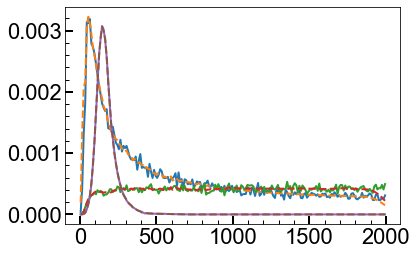

In [9]:
plt.plot(Ebin_ctr,NR/g4['NR']['tlive'])
plt.plot(Ebin_ctr,NRav/g4['NR']['tlive'],'--')

plt.plot(Ebin_ctr,ER/g4['ER']['tlive'])
plt.plot(Ebin_ctr,ERav/g4['ER']['tlive'],'--')

plt.plot(Ebin_ctr,NG/cap['tlive'])
plt.plot(Ebin_ctr,NGav/cap['tlive'],'--')

In [10]:
#Measured
N_meas_PuBe,_ = np.histogram(meas['PuBe']['E'],bins=Ebins)
N_meas_Bkg,_ = np.histogram(meas['Bkg']['E'],bins=Ebins)

R_meas = N_meas_PuBe/meas['PuBe']['tlive']-N_meas_Bkg/meas['Bkg']['tlive']
dR_meas = np.sqrt( N_meas_PuBe/(meas['PuBe']['tlive']**2) + N_meas_Bkg/(meas['Bkg']['tlive']**2) )

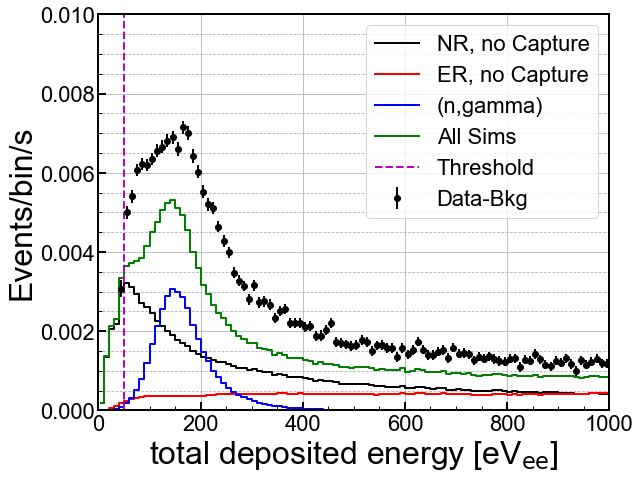

In [11]:
spec.plotSpectra(E_bins=Ebins, N_nr=NRav/g4['NR']['tlive'], N_er=ERav/g4['ER']['tlive'], 
                 N_ng=NGav/cap['tlive'], N_meas=R_meas, dN_meas=dR_meas , 
                 yrange=(0,1e-2), thresh=50)